### **IMPORTAÇÃO DAS BIBLIOTECAS**

In [ ]:
# Instalações e/ou atualizações

!pip install tensorflow

# Processamento

import numpy as np

# Modelagem

import tensorflow as tf
from tensorflow import keras

# Visualização

import matplotlib.pyplot as plt

### **FUNÇÕES**

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[..., 0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        thisplot[predicted_label].set_color('green')
    else:
        thisplot[predicted_label].set_color('red')
        thisplot[true_label].set_color('green')

### **PROCESSAMENTO DOS DADOS**

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

### **CONVOLUTIONAL NEURAL NETWORK (CNN)**

In [ ]:
# Criação do modelo:

cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilação do modelo:

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
# Treinamento do modelo:

cnn.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4857 - accuracy: 0.8202
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3118 - accuracy: 0.8854
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2663 - accuracy: 0.9011
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2346 - accuracy: 0.9132
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2097 - accuracy: 0.9222
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1892 - accuracy: 0.9294
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1731 - accuracy: 0.9354
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1553 - accuracy: 0.9423
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1419 - accuracy: 0.9469
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0

In [ ]:
# Avaliação do modelo:

test_loss, test_acc = cnn.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2934 - accuracy: 0.9088 - 1s/epoch - 4ms/step

Test accuracy: 0.9088000059127808


In [ ]:
# Predições do modelo:

predictions = cnn.predict(test_images)

313/313 [==============================] - 1s 2ms/step


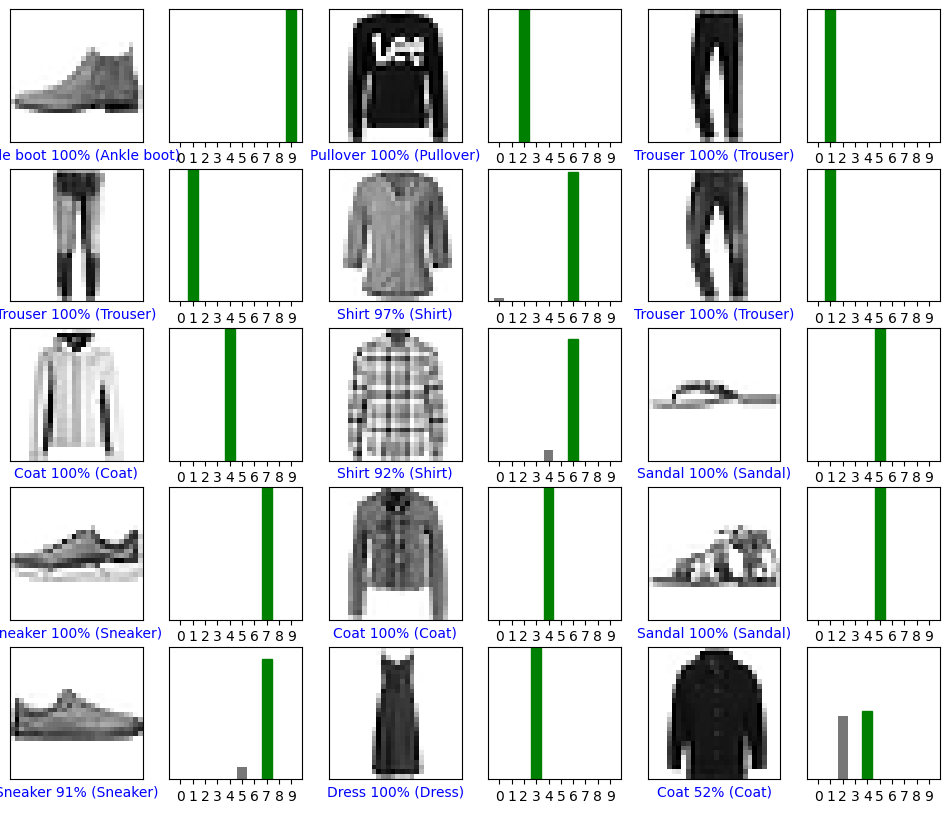

In [ ]:
# Visualização das imagens com as predições:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

### **REFERÊNCIAS**

1. https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br
2. https://github.com/zalandoresearch/fashion-mnist?tab=readme-ov-file